# Kaggle Competition of Iceberg


## Peining Che, Shangye Chen

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import package we will need. We will use pandas for reading the json files.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from subprocess import check_output

## Data

Read data using pandas.

In [ ]:
train_df = pd.read_json('train.json') # Read the json files into a pandas dataframe

In [3]:
test_df = pd.read_json('test.json')

After read data, we implement some graph that show some of the train images and test images. There are 2 kinds of images in the data set: band 1 images and band 2 images. We will select randomly for each type and display. As the Kaggle competition said, the images have 70X75 pixels size, so we reshape the image before displaying. 

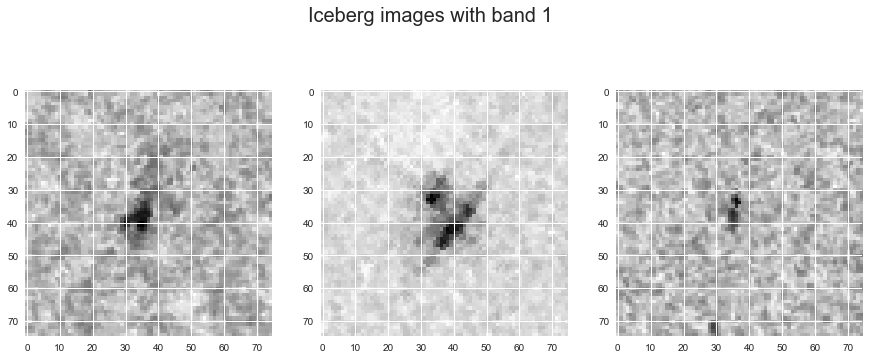

In [4]:
# FIrst we will get 9 random icebergs
df_plot = train_df.loc[train_df['is_iceberg'] == True].sample(3)

plt.figure(figsize=(15,6))
for i in range(3):
     # we will set the current subplot
    plt.subplot(1,3,(i+1))
     # Then we will reshape the array to 75x75
    image = np.array(df_plot.iloc[i]['band_1']).reshape((75,75)).astype(np.float32)
    plt.imshow(image)
    # finally we will set the title as
plt.suptitle('Iceberg images with band 1',fontsize=20)

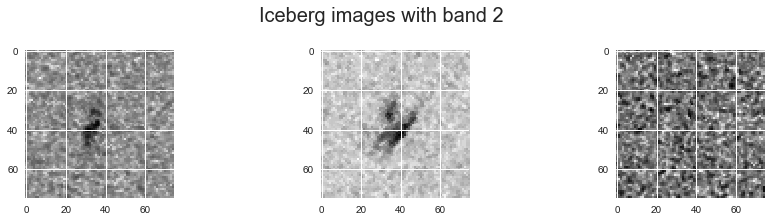

In [5]:
plt.figure(figsize=(15,6))
for i in range(3):
     # Set the current subplot
    plt.subplot(2,3,(i+1))
    # Reshape the array to 75x75
    image = np.array(df_plot.iloc[i]['band_2']).reshape((75,75)).astype(np.float32)
    plt.imshow(image)
    

plt.suptitle('Iceberg images with band 2',fontsize=20)

Images for boats.

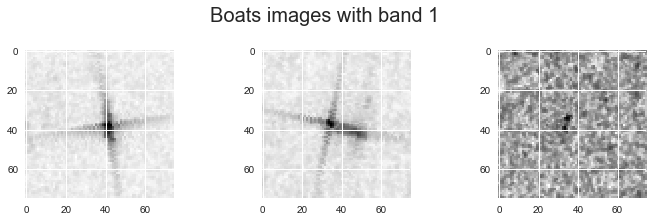

In [6]:
# FIrst get 9 random boats
df_plot = train_df.loc[train_df['is_iceberg'] == False].sample(9)

plt.figure(figsize=(12,6))
for i in range(3):
     # Set the current subplot
    plt.subplot(2,3,(i+1))
    # Reshape the array to 75x75
    image = np.array(df_plot.iloc[i]['band_1']).reshape((75,75)).astype(np.float32)
    plt.imshow(image)

    
plt.suptitle('Boats images with band 1', fontsize=20)

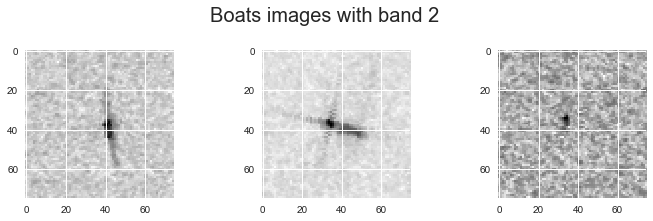

In [7]:
plt.figure(figsize=(12,6))
for i in range(3):
    plt.subplot(2,3,(i+1))
    image = np.array(df_plot.iloc[i]['band_2']).reshape((75,75)).astype(np.float32)
    plt.imshow(image)

    
plt.suptitle('Boats images with band 2', fontsize=20)

Since there are some invalid value under inc_anfle, we need to change the value to numerical values in order to train the data sets. Also, reshape all images into 75 by 75 pixels. 

In [8]:
train_df.inc_angle = train_df.inc_angle.replace('na',0)
test_df.inc_angle = test_df.inc_angle.replace('na',0)

# Train data
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train_df["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train_df["band_2"]])
X_train = np.concatenate([x_band1[:, :, :, np.newaxis], x_band2[:, :, :, np.newaxis]], axis=-1)
y_train = np.array(train_df["is_iceberg"])
print("Xtrain:", X_train.shape)

# Test data
x_test_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test_df["band_1"]])
x_test_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test_df["band_2"]])
X_test = np.concatenate([x_band1[:, :, :, np.newaxis], x_band2[:, :, :, np.newaxis]], axis=-1)
print("Xtest:", X_test.shape)

('Xtrain:', (1604, 75, 75, 2))
('Xtest:', (1604, 75, 75, 2))


## Modeling with Keras

Then, we can apply Keras on the well trained data. We import the karas into notebook.

In [1]:
from subprocess import check_output
from keras.models import Sequential
from keras.layers import Convolution2D, GlobalAveragePooling2D, Dense, Dropout

Using TensorFlow backend.


Fit a model using kera.

In [3]:
model = Sequential()
model.add(Convolution2D(32, 3, activation="relu", input_shape=(75, 75, 2)))
model.add(Convolution2D(64, 3, activation="relu", input_shape=(75, 75, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 73, 73, 32)        608       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 19,169
Trainable params: 19,169
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(X_train, y_train, validation_split=0.2)

NameError: name 'X_train' is not defined